# Data Exploration

In this notebook, we demonstrate how to use some data exploration tools in Python, using the Climate and Economic Justice Screening Tool data. We will cover descriptive statistics, histograms, scatter plots, joint plots, and Spearman correlation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
cej_cols = ['Percent Black or African American alone', 'Percent Hispanic or Latino', 'Percent White',
'Percent of individuals < 100% Federal Poverty Line',
'Share of properties at risk of flood in 30 years',
"Share of the tract's land area that is covered by impervious surface or cropland as a percent",
'Percent pre-1960s housing (lead paint indicator)']

In [3]:
data = pd.read_csv('data/cejst.csv', usecols=cej_cols)

In [4]:
new_cols = ['Black %', 'Hispanic/Latino %', 'White %', 'Below Poverty %', 
            'Flood Property Risk %', 'Impervious Surface %', 'Older Housing %']

In [5]:
data.rename(columns=dict(zip(cej_cols, new_cols)), inplace=True)

In [6]:
# Fixing a bug in CEJST data
data['Impervious Surface %'] = data['Impervious Surface %'] / 100

In [7]:
# Making the race data in terms of percent rather than fraction
data['Black %'] = data['Black %'] * 100
data['Hispanic/Latino %'] = data['Hispanic/Latino %'] * 100
data['White %'] = data['White %'] * 100

In [8]:
data.head()

,Black %,White %,Hispanic/Latino %,Flood Property Risk %,Older Housing %,Impervious Surface %,Below Poverty %
0,7.0,83.0,1.0,22.0,17.0,7.60,16.0
1,57.0,38.0,1.0,25.0,19.0,20.58,19.0
2,24.0,65.0,6.0,7.0,5.0,23.53,17.0
3,5.0,89.0,1.0,9.0,11.0,23.33,4.0
4,18.0,70.0,4.0,3.0,0.0,39.55,15.0


## Descriptive Statistics 
Compute the descriptive statistics of the study variables to see the central tendencies of the data. You can use the [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function in pandas.

In [9]:
data.describe()

,Black %,White %,Hispanic/Latino %,Flood Property Risk %,Older Housing %,Impervious Surface %,Below Poverty %
count,73389.000000,73390.000000,73387.000000,73338.000000,73976.000000,72539.000000,73124.000000
mean,13.411669,60.000313,17.178138,12.005972,30.822118,38.938970,14.522756
std,21.669549,30.538554,23.124971,16.552681,26.617895,23.460262,12.143650
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,36.000000,2.000000,3.000000,7.000000,19.760000,6.000000
50%,4.000000,68.000000,7.000000,7.000000,24.000000,38.190000,11.000000
75%,15.000000,86.000000,21.000000,13.000000,50.000000,56.100000,20.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,98.460000,100.000000


<Axes: >

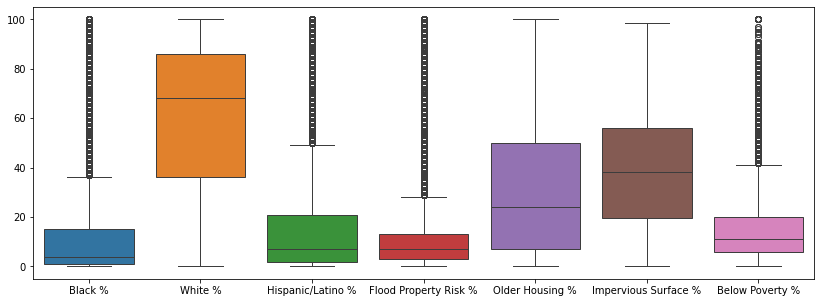

In [10]:
fig, ax = plt.subplots(figsize=(14,5))
sns.boxplot(data=data, ax=ax)

## Histograms 
Create histograms for each variable. I suggest [seaborn](https://seaborn.pydata.org/generated/seaborn.histplot.html).

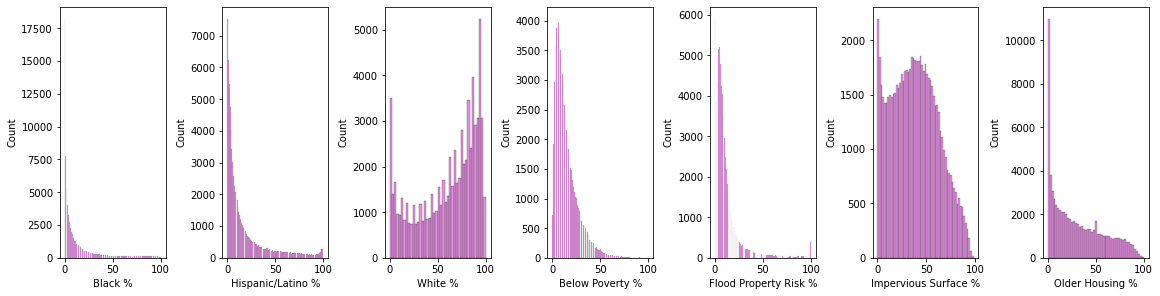

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(16,4), constrained_layout=True)

for k, ax in enumerate(axes.flatten()):
    sns.histplot(data=data, x=data[new_cols[k]], ax=ax, color='orchid')

## Scatter Plots

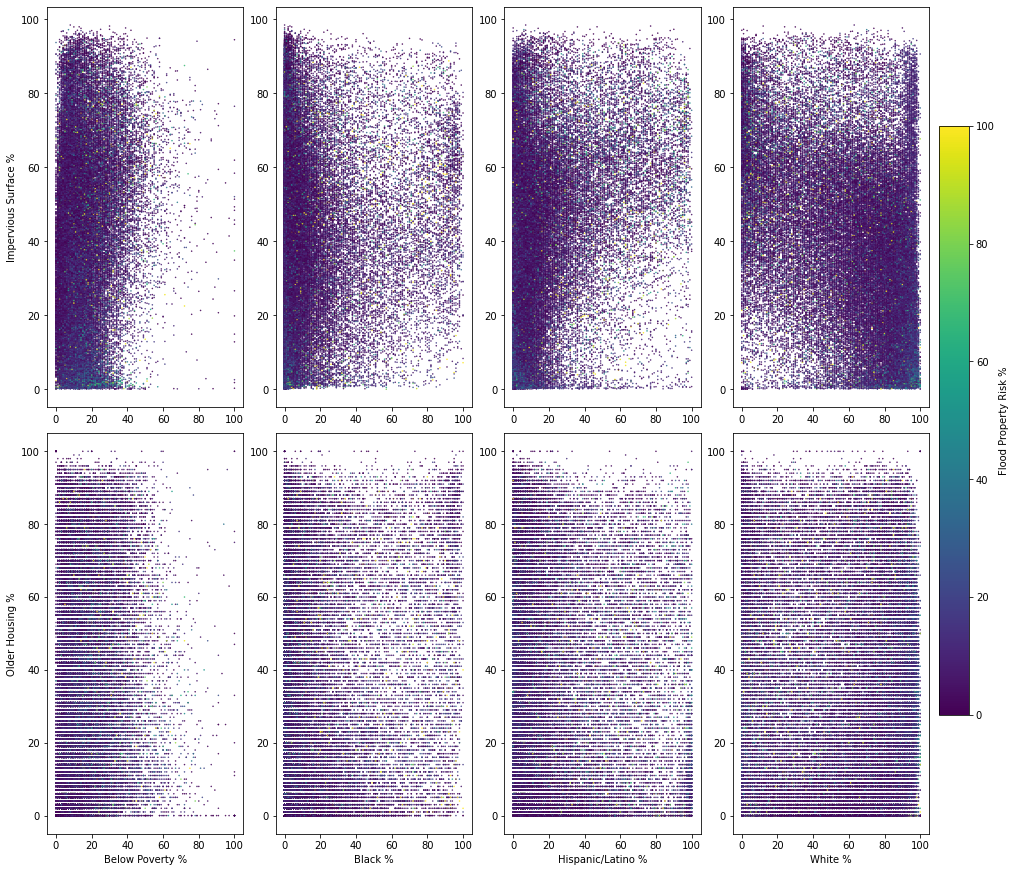

In [12]:
nrows, ncols = 2, 4
env = ['Impervious Surface %', 'Older Housing %']
demo = ['Below Poverty %', 'Black %', 'Hispanic/Latino %', 'White %']
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14,12), constrained_layout=True)
for i in range(4):
    for j in range(2):
        ax1 = axes[j,i].scatter(x=data[demo[i]], y=data[env[j]], c=data['Flood Property Risk %'], s=0.25)

for a in range(nrows):
    axes[a,0].set_ylabel(env[a])
for b in range(ncols):
    axes[-1,b].set_xlabel(demo[b])
fig.colorbar(ax1, ax=axes[:, -1], label='Flood Property Risk %', location='right')

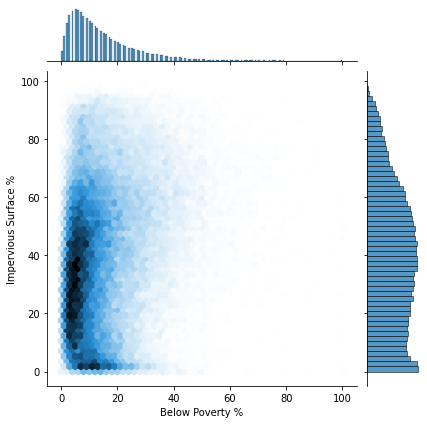

In [13]:
sns.jointplot(data=data, x='Below Poverty %', y='Impervious Surface %', kind='hex')

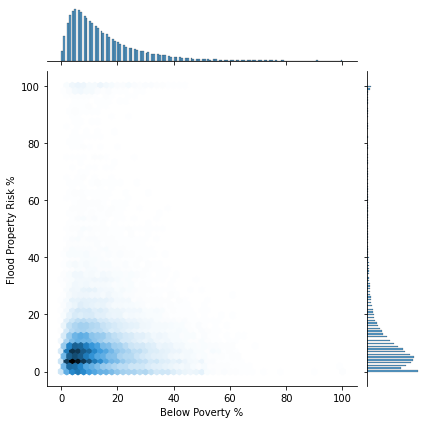

In [14]:
sns.jointplot(data=data, x='Below Poverty %', y='Flood Property Risk %', kind='hex')

## Spearman Correlation Analysis
Compute a Spearman correlation analysis of the variables. Here, we align Spearman since our model will be non-parametric.

Text(0.5, 0.9, "Spearman's Rank Correlation Coefficients \n for Study Variables")

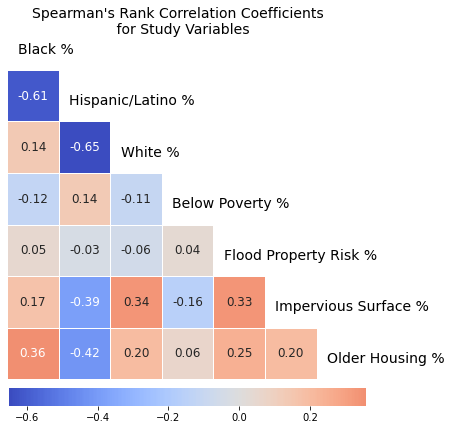

In [15]:
matrix = data.corr(method='spearman')

mask = np.zeros_like(matrix)

mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots(figsize=(8,8))

sns.heatmap(matrix, center = 0, square = True, mask=mask, ax=ax, fmt = ".2f", annot= True, annot_kws={'size': 12},
            linecolor='white', linewidths=0.5, xticklabels=False, cmap='coolwarm',
            cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.02, shrink=0.8));

plt.tick_params(left = False, labelleft=False) 

for i, label in enumerate(new_cols):
    ax.text(i + 0.2, i + 0.6, label, ha='left', va='center', fontsize=14)

plt.suptitle("Spearman's Rank Correlation Coefficients \n for Study Variables", fontsize=14, y=.9)

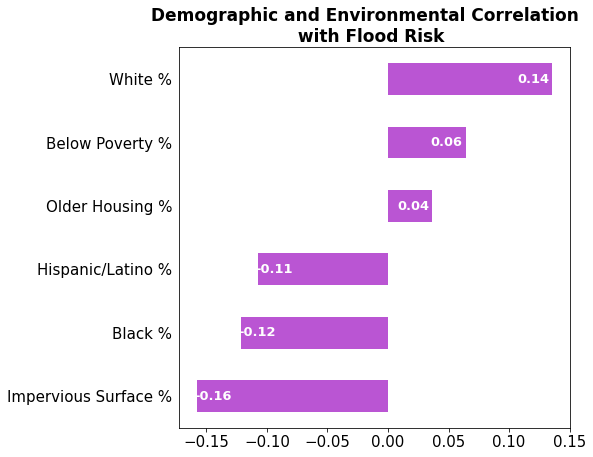

In [16]:
f_cols = ['Black %', 'Hispanic/Latino %', 'White %', 'Below Poverty %', 
          'Impervious Surface %', 'Older Housing %']
fig, ax = plt.subplots(figsize=(7,7))

hbars = data[f_cols].corrwith(data['Flood Property Risk %'], method='spearman').sort_values(ascending=True).plot(kind='barh', color='mediumorchid', ax=ax, fontsize=15)
hbars.bar_label(ax.containers[0], fmt="{:.2f}", color='white', weight='bold', fontsize=13, padding=-35)

plt.suptitle('Demographic and Environmental Correlation \n with Flood Risk', fontsize=17, y=0.96, weight='bold')
plt.tick_params(left = False) 